<a href="https://colab.research.google.com/github/ylnrahma/Machlearn_TI/blob/main/Kuis_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



















#KUIS KELOMPOK 6 -->
#KELAS : 3B
#NAMA :
#AFIFAH NOFA KURNIA RAHMADANI(2141720103)
#AHMAD RIFKI FAUZI(2141720028)
#ALFINO FEBRY KRISSAPUTRA(2141720187)
#FADLILA AFIDA(2141720130)
#YULIYANA RAHMAWATI(2141720241)


Mengunduh Data Set

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##  1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

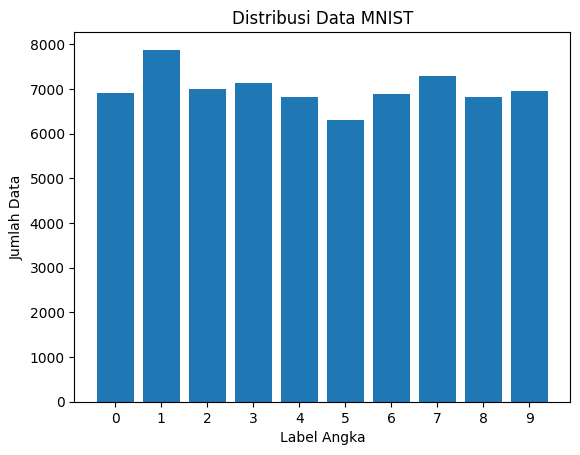

Tidak ada ketidakseimbangan yang signifikan dalam dataset MNIST.
Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah sampel per label
unique_labels, label_counts = np.unique(mnist.target, return_counts=True)

# Menampilkan distribusi sampel per label
plt.bar(unique_labels, label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data MNIST')
plt.xticks(unique_labels)
plt.show()

# Cek apakah terdapat ketidakseimbangan
min_count = label_counts.min()
max_count = label_counts.max()
imbalance_ratio = max_count / min_count

if imbalance_ratio > 2:
    print("Terjadi ketidakseimbangan dalam dataset MNIST.")
else:
    print("Tidak ada ketidakseimbangan yang signifikan dalam dataset MNIST.")

# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


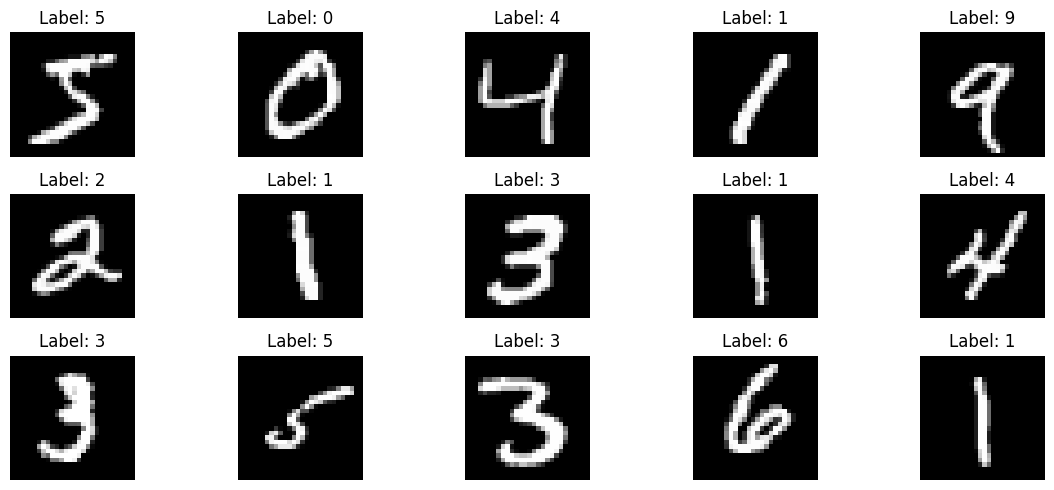

In [ ]:

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil 15 gambar pertama dan labelnya
images = mnist.data
labels = mnist.target

# Menampilkan gambar dan labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

##3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk


*   Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
*   Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.


In [ ]:
# Import library yang diperlukan
import numpy as np

# Mendapatkan data citra asli
X = mnist.data

# Mendapatkan label
y = mnist.target.astype(int)

# Menampilkan dimensi dari data
print("Dimensi data citra:", X.shape)  # Output: (70000, 784)

# X adalah matriks 70000x784, dengan setiap baris adalah vektor fitur 784-dimensi
# y adalah array yang berisi label dari setiap citra


Dimensi data citra: (70000, 784)


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan dan data pengujian dengan rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian dengan rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian dengan rasio 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)


5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.


* Klasifikasi Naive Bayes

Rasio 70 : 30

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_70, y_train_70)

# Melakukan prediksi pada data pengujian
y_pred_nb = nb_classifier.predict(X_test_30)

Rasio 80 : 20

In [ ]:
# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_80, y_train_80)

# Melakukan prediksi pada data pengujian
y_pred_nb_80 = nb_classifier.predict(X_test_20)

Rasio 90 : 10

In [ ]:
# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_90, y_train_90)

# Melakukan prediksi pada data pengujian
y_pred_nb_90 = nb_classifier.predict(X_test_10)

* Klasifikasi SVM

Rasio 70 : 30

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()

# Melatih model SVM pada data pelatihan
svm_classifier.fit(X_train_70, y_train_70)

# Melakukan prediksi pada data pengujian
y_pred_svm = svm_classifier.predict(X_test_30)


6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classication_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [ ]:
# Evaluasi Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model Naive Bayes dengan rasio 70:30
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 70:30")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_30, y_pred_nb)}")
print(f"Classification report data testing:\n{classification_report(y_test_30, y_pred_nb)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_30, y_pred_nb)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 80:20
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 80:20")
print(f"Akurasi data training: {accuracy_score(y_train_80, y_train_80)}")
print(f"Akurasi data testing: {accuracy_score(y_test_20, y_pred_nb_80)}")
print(f"Classification report data testing:\n{classification_report(y_test_20, y_pred_nb_80)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_20, y_pred_nb_80)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 90:10
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 90:10")
print(f"Akurasi data training: {accuracy_score(y_train_90, y_train_90)}")
print(f"Akurasi data testing: {accuracy_score(y_test_10, y_pred_nb_90)}")
print(f"Classification report data testing:\n{classification_report(y_test_10, y_pred_nb_90)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_10, y_pred_nb_90)}")

Evaluasi Naive Bayes
Evaluasi Naive Bayes dengan rasio 70:30
Akurasi data training: 1.0
Akurasi data testing: 0.8257142857142857
Classification report data testing:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000

Confusion matrix data testing:
[[1857    1   12    6    4   33   40    1  10

In [ ]:
# Evaluasi SVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Evaluasi SVM")
print("Evaluasi SVM dengan rasio 70:30")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_30, y_pred_svm)}")
print(f"Classification report data testing:\n{classification_report(y_test_30, y_pred_svm)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_30, y_pred_svm)}")
print("\n\n")


Evaluasi SVM
Evaluasi SVM dengan rasio 70:30
Akurasi data training: 1.0
Akurasi data testing: 0.9762857142857143
Classification report data testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.97      0.97      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.99      2088
           7       0.97      0.97      0.97      2248
           8       0.98      0.96      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

Confusion matrix data testing:
[[2035    1    3    0    1    4    8    2    4    0]
 [   0 2


7.   Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.




**Naive Bayes**

*  Ratio 70:30




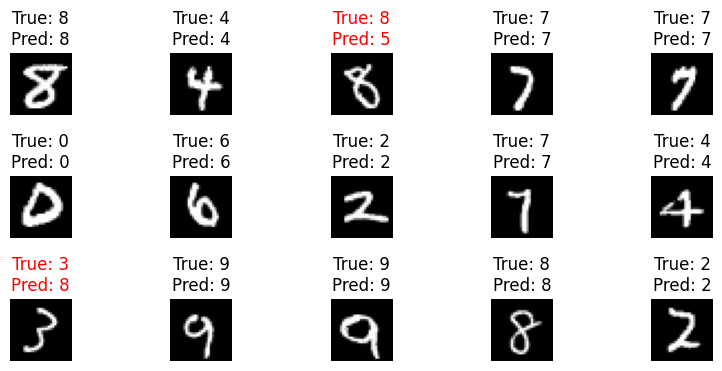

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_nb.iloc[i] if isinstance(y_pred_nb, pd.Series) else y_pred_nb[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()


*   Ratio 80:20



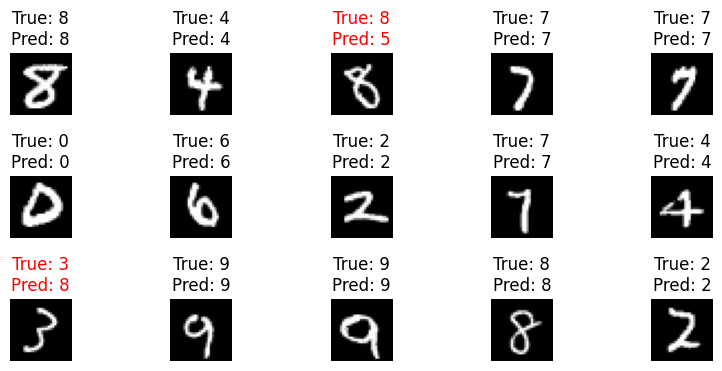

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_nb_80.iloc[i] if isinstance(y_pred_nb_80, pd.Series) else y_pred_nb_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()


*   Ratio 90:10



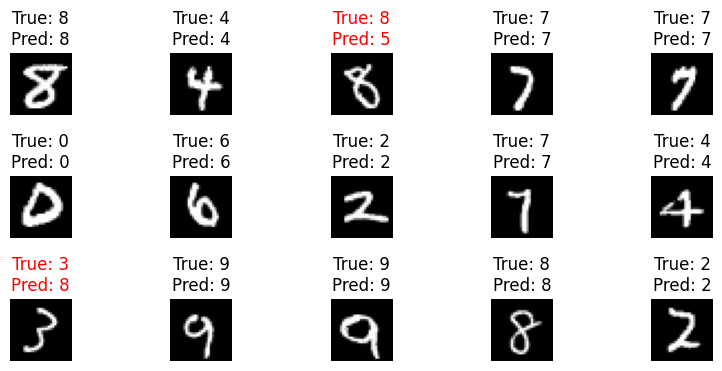

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_nb_90.iloc[i] if isinstance(y_pred_nb_90, pd.Series) else y_pred_nb_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**SVM**


*   Ratio 70:30



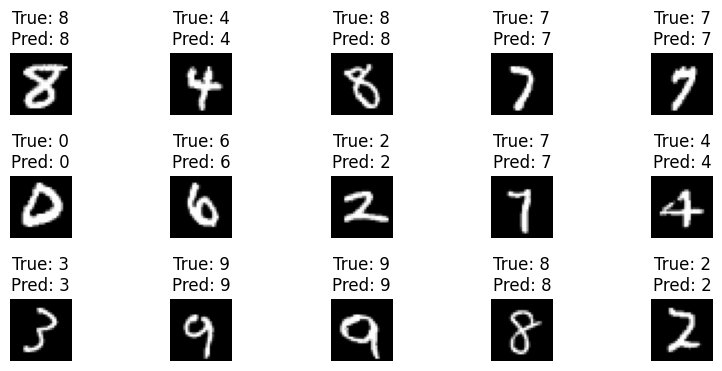

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_svm.iloc[i] if isinstance(y_pred_svm, pd.Series) else y_pred_svm[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()


8.   Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

    **Jawaban:**
    
    Model terbaik yaitu dengan menggunakan Support Vector Machine (SVM).
    
    Konfigurasinya yaitu menggunakan kernel RBF (Radial Basis Function) untuk SVM dan mengatur seed (random_state).

    Tingkat akurasi : dengan mencoba dan mencapai tingkat akurasi sebesar 98% saat menggunakan rasio data pelatihan dan pengujian 80:20.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_classifier = GaussianNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_70, y_train_70)

# Melakukan prediksi pada data pengujian
y_pred_nb_gs = nb_classifier.predict(X_test_30)

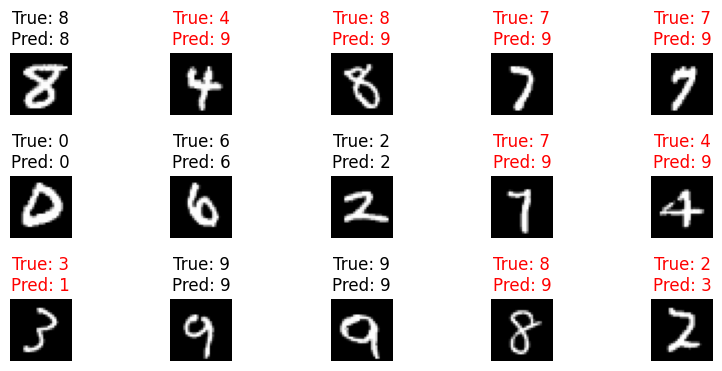

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_nb_gs.iloc[i] if isinstance(y_pred_nb_gs, pd.Series) else y_pred_nb_gs[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()